In [8]:
import logging
from ome_zarr_utils import (
    convert_czi2hcs_omezarr,
    convert_czi2hcs_ngff,
    omezarr_package,
    write_omezarr,
    write_omezarr_ngff,
    setup_logging,
)
import ngff_zarr as nz
from pathlib import Path
from czitools.read_tools import read_tools
from typing import Optional
import matplotlib.pyplot as plt

In [ ]:
# use link if this is a public file
omezarr_path = r"F:\Testdata_Zeiss\OME_ZARR_Testfiles\DTScan_ID4.ome.zarr"

channel_index = 0

# Open the ome-zarr versions of the data using ngff-zarr
image_cloud = nz.from_ngff_zarr(omezarr_path)

In [29]:
# Let's look at the shape of the full resolution image
# (This is courtesy of dask, which we'll discuss later)
image_cloud.images[channel_index].data

dask.array<from-zarr, shape=(1, 3, 1, 10160, 12672), dtype=uint16, chunksize=(1, 1, 1, 10160, 12672), chunktype=numpy.ndarray>

In [30]:
# Crop the image -- and see the underlying shape
crop = image_cloud.images[channel_index].data[0, 0, 0, 4000:4400, 4000:4300]
crop

dask.array<getitem, shape=(400, 300), dtype=uint16, chunksize=(400, 300), chunktype=numpy.ndarray>

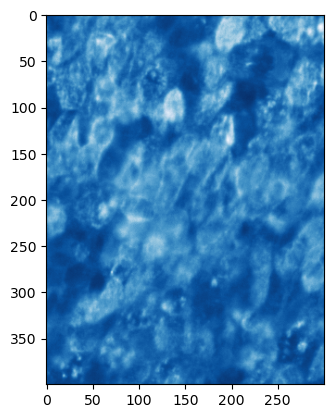

CPU times: total: 672 ms
Wall time: 673 ms


In [31]:
%%time
# Actually fetch the data & render it
crop_data = crop.compute()
plt.imshow(crop_data, cmap='Blues_r')
plt.show()

In [32]:
# Crop the image -- and see the underlying shape
image = image_cloud.images[3].data[0, 0, 0, ...]
image

dask.array<getitem, shape=(1270, 1584), dtype=uint16, chunksize=(1270, 1584), chunktype=numpy.ndarray>

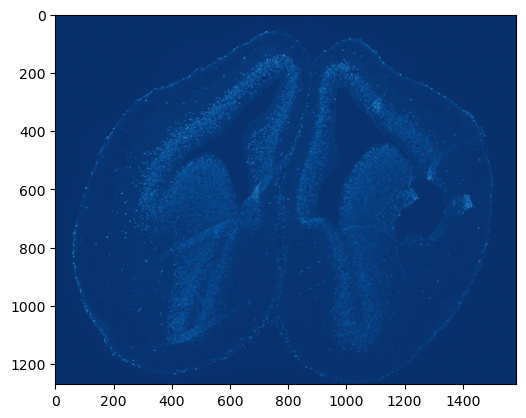

CPU times: total: 406 ms
Wall time: 399 ms


In [33]:
%%time
# Actually fetch the data & render it
image_data = image.compute()
plt.imshow(image_data, cmap='Blues_r')
plt.show()